In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [5]:
loc = ['local'] # eventually append distal
cont = ['0.0','0.1','0.2','0.3','0.4'] # contrast, eventually append 0.1, 0.2, 0.3, 0.4
chr2tar = ['PV','SOM'] # chr2 target, eventually append SOM
chr2str = ['0.0','0.1','0.2'] # only do these three
j = 0
for l in loc:
    for c in cont:
        for t in chr2tar:
            for s in chr2str:
                filedir = '%s'%l+'_'+'%s'%c+'_'+'%s'%t+'_'+'%s'%s
                j=j+1
                print(filedir)
                #getRatesAndErrs(filedir)
#print(j)

local_0.0_PV_0.0
local_0.0_PV_0.1
local_0.0_PV_0.2
local_0.0_SOM_0.0
local_0.0_SOM_0.1
local_0.0_SOM_0.2
local_0.1_PV_0.0
local_0.1_PV_0.1
local_0.1_PV_0.2
local_0.1_SOM_0.0
local_0.1_SOM_0.1
local_0.1_SOM_0.2
local_0.2_PV_0.0
local_0.2_PV_0.1
local_0.2_PV_0.2
local_0.2_SOM_0.0
local_0.2_SOM_0.1
local_0.2_SOM_0.2
local_0.3_PV_0.0
local_0.3_PV_0.1
local_0.3_PV_0.2
local_0.3_SOM_0.0
local_0.3_SOM_0.1
local_0.3_SOM_0.2
local_0.4_PV_0.0
local_0.4_PV_0.1
local_0.4_PV_0.2
local_0.4_SOM_0.0
local_0.4_SOM_0.1
local_0.4_SOM_0.2


In [2]:
# create a function that takes a directory as input and 
# spits out the mean firing rates and standard errors for each population

def getRatesAndErrs(filedir,duration,window,numChr2):
    '''
    gets firing rates and errors by counting spikes over a simulation of
    total length 'duration' milliseconds in windows of time with width 'window' ms.
    'numChr2' is the total number of ChR2 stimulations
    '''
    f = 1000/(window*numChr2) # factor to multiply spike counts by to get firing rates in Hz
    
    with open('%s/all_spikes.pickle'%filedir, 'rb') as file:
        all_spikes = pickle.load(file)
    
    control_times = []
    chr_times = []
    ii = 0
    is_control = True
    while True:
        start_time = ii * 500
        stop_time = start_time + window # 40
        if is_control:
            control_times.append(start_time)
        else:
            chr_times.append(start_time)   
        ii += 1
        if is_control:
            is_control = False
        else:
            is_control = True        
        if stop_time > duration: break
            
    exc_positions = np.load('%s/exc_positions.npy'%filedir)        
    chr2_spikes = []
    for ni in range(8000):
        pos_x, pos_y, pos_z = exc_positions[:,ni]
        dist = np.sqrt((0.5-pos_x)**2 + (0.5-pos_y)**2)
        if dist > 0.2: # only want activity local to the center
            continue
        
        nspikes = 0
        for tim in chr_times:
            aa = all_spikes[ni] [all_spikes[ni] > tim ]
            aa = aa [aa < tim+window]
            nspikes += len(aa)
        chr2_spikes.append(nspikes*f)       
    excMean = np.mean(chr2_spikes)
    excSEM = stats.sem(chr2_spikes)
            
    pv_positions = np.load('%s/pv_positions.npy'%filedir)
    chr2_spikes = []
    for ni in range(1000):        
        pos_x, pos_y, pos_z = pv_positions[:,ni]
        dist = np.sqrt((0.5-pos_x)**2 + (0.5-pos_y)**2)
        if dist > 0.2:
            continue
        
        nspikes = 0
        for tim in chr_times:
            aa = all_spikes[ni+8000] [all_spikes[ni+8000] > tim ]
            aa = aa [aa < tim+window]
            nspikes += len(aa)
        chr2_spikes.append(nspikes*f)
        
    pvMean = np.mean(chr2_spikes)
    pvSEM = stats.sem(chr2_spikes)   
    
    sst_positions = np.load('%s/som_positions.npy'%filedir)
    chr2_spikes = []
    for ni in range(1000):
        
        pos_x, pos_y, pos_z = sst_positions[:,ni]
        dist = np.sqrt((0.5-pos_x)**2 + (0.5-pos_y)**2)
        if dist > 0.2:
            continue
        
        nspikes = 0
        for tim in chr_times:
            aa = all_spikes[ni+9000] [all_spikes[ni+9000] > tim ]
            aa = aa [aa < tim+window]
            nspikes += len(aa)
        chr2_spikes.append(nspikes*f)
        
    somMean = np.mean(chr2_spikes)
    somSEM = stats.sem(chr2_spikes)
    
    means = [excMean, pvMean, somMean]
    SEMs = [excSEM, pvSEM, somSEM]
    return [means, SEMs]
        

In [7]:
loc = ['local'] # eventually append distal
cont = ['0.0','0.1','0.2','0.3','0.4'] # contrast, eventually append 0.1, 0.2, 0.3, 0.4
chr2tar = ['PV','SOM'] # chr2 target, eventually append SOM
chr2str = ['0.0','0.1','0.2'] # only do these three
meanDict = {}
semDict = {}
j = 0
for l in loc:
    for c in cont:
        for t in chr2tar:
            for s in chr2str:
                filedir = '%s'%l+'_'+'%s'%c+'_'+'%s'%t+'_'+'%s'%s
                j=j+1
                #print(filedir)
                meanDict[filedir],semDict[filedir] = getRatesAndErrs(filedir,10000,40,10)
print('meanDict = '+str(meanDict))
print('\nsemDict = '+str(semDict))

meanDict = {'local_0.0_PV_0.0': [7.527777777777778, 12.258620689655173, 5.275229357798165], 'local_0.0_PV_0.1': [2.7474747474747474, 16.79310344827586, 4.610091743119266], 'local_0.0_PV_0.2': [0.398989898989899, 24.948275862068964, 4.26605504587156], 'local_0.0_SOM_0.0': [7.527777777777778, 12.258620689655173, 5.275229357798165], 'local_0.0_SOM_0.1': [4.053030303030303, 6.5344827586206895, 17.041284403669724], 'local_0.0_SOM_0.2': [1.7121212121212122, 3.413793103448276, 24.56422018348624], 'local_0.1_PV_0.0': [8.785353535353535, 14.086206896551724, 5.573394495412844], 'local_0.1_PV_0.1': [3.9444444444444446, 18.0, 5.114678899082569], 'local_0.1_PV_0.2': [0.7878787878787878, 25.689655172413794, 4.610091743119266], 'local_0.1_SOM_0.0': [8.785353535353535, 14.086206896551724, 5.573394495412844], 'local_0.1_SOM_0.1': [5.292929292929293, 7.896551724137931, 16.788990825688074], 'local_0.1_SOM_0.2': [2.823232323232323, 4.724137931034483, 24.88532110091743], 'local_0.2_PV_0.0': [10.18939393939

Text(0, 0.5, 'Exc mean firing rate (Hz)')

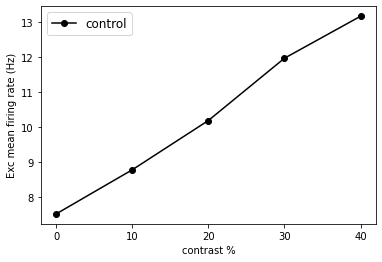

In [20]:
# make the plots for local PV stim
#print('x-axis = '+str(cont))
chr0excMeans = np.zeros(len(cont))
i=0
for c in cont:
    #filedir = '%s'%l+'_'+'%s'%c+'_'+'%s'%t+'_'+'%s'%s
    ind = 'local_%s'%c+'_PV_0.0'
    #print(ind)
    #print(meanDict[ind][0])
    chr0excMeans[i] = meanDict[ind][0]
    i+=1
#chr0excMeans = meanDict['local_0.0_PV_0.0'][0]
#print(chr0excMeans)
cont = np.array(cont,dtype=float)
plt.plot(cont,chr0excMeans,linestyle='-',marker='o',color='black',label='control')
plt.xticks([0,.1,.2,.3,.4],['0','10','20','30','40'])
plt.legend(fontsize=12)
plt.xlabel('contrast %')
plt.ylabel('Exc mean firing rate (Hz)')

{'chr0excMeans': array([ 7.52777778,  8.78535354, 10.18939394, 11.96464646, 13.16161616]), 'chr0excSEMs': array([0.20850948, 0.23050062, 0.26045704, 0.28139455, 0.29205912]), 'chr1excMeans': array([2.74747475, 3.94444444, 4.16919192, 5.46717172, 5.85858586]), 'chr1excSEMs': array([0.11644801, 0.13510461, 0.16400395, 0.17894584, 0.19529974]), 'chr2excMeans': array([0.3989899 , 0.78787879, 1.6969697 , 2.15151515, 2.84848485]), 'chr2excSEMs': array([0.04278599, 0.05521912, 0.08529999, 0.09846216, 0.1155252 ])}


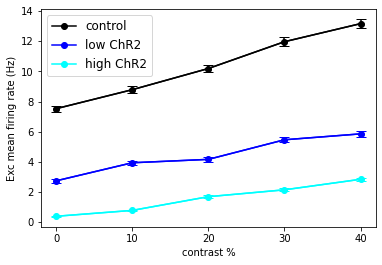

In [45]:
# expand upon the above code to show ChR2 stims
# for s in chr2str:
#     lab = str(int(10*float(s)))
    #print(int(10*float(s)))
data = {}
for s in chr2str:
    lab = str(int(10*float(s)))
    #print(lab)
    #data['chr'+lab+'excMeans'] = 0
#print(data['chr0excMeans'])    
    data['chr'+lab+'excMeans'] = np.zeros(len(cont))
    data['chr'+lab+'excSEMs'] = np.zeros(len(cont))
    i=0
    for c in cont:
        #filedir = '%s'%l+'_'+'%s'%c+'_'+'%s'%t+'_'+'%s'%s
        ind = 'local_%s'%c+'_PV_%s'%s
        data['chr'+lab+'excMeans'][i] = meanDict[ind][0]
        data['chr'+lab+'excSEMs'][i] = semDict[ind][0]
        i+=1
print(data)
# cont = np.array(cont,dtype=float)

plt.errorbar(cont, data['chr0excMeans'], yerr = data['chr0excSEMs'], c='black', capsize=5)
plt.plot(cont,data['chr0excMeans'],linestyle='-',marker='o',color='black',label='control')
plt.errorbar(cont, data['chr1excMeans'], yerr = data['chr1excSEMs'], c='blue', capsize=5)
plt.plot(cont,data['chr1excMeans'],linestyle='-',marker='o',color='blue',label='low ChR2')
plt.errorbar(cont, data['chr2excMeans'], yerr = data['chr2excSEMs'], c='aqua', capsize=5)
plt.plot(cont,data['chr2excMeans'],linestyle='-',marker='o',color='aqua',label='high ChR2')
plt.xticks([0,.1,.2,.3,.4],['0','10','20','30','40'])
plt.legend(fontsize=12)
plt.xlabel('contrast %')
plt.ylabel('Exc mean firing rate (Hz)')
plt.savefig('exc_localPV.png',bbox_inches='tight',dpi=200)
plt.show()

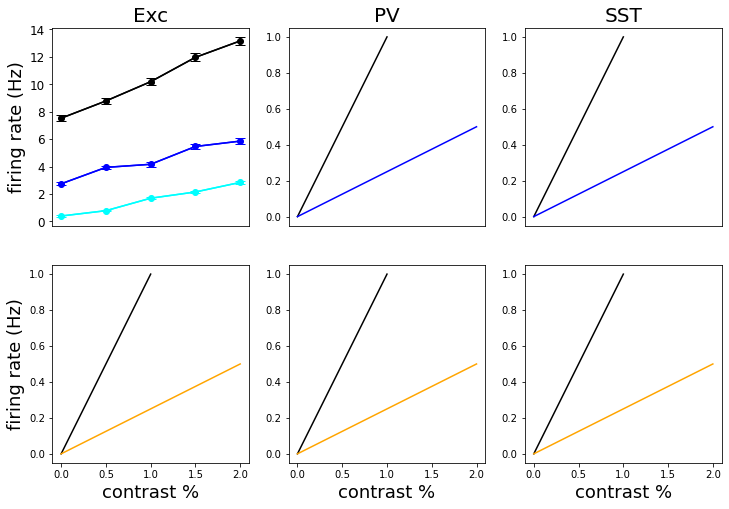

In [57]:
# start with local
# test out plotting code   
fig, axes = plt.subplots(2,3,figsize = (12,8),gridspec_kw = {'height_ratios':[1,1]})

ax00 = axes[0][0] # top left
ax00.set_title('Exc',fontsize=20)
ax00.errorbar(cont, data['chr0excMeans'], yerr = data['chr0excSEMs'], c='black', capsize=5)
ax00.plot(cont,data['chr0excMeans'],linestyle='-',marker='o',color='black',label='control')
ax00.errorbar(cont, data['chr1excMeans'], yerr = data['chr1excSEMs'], c='blue', capsize=5)
ax00.plot(cont,data['chr1excMeans'],linestyle='-',marker='o',color='blue',label='low ChR2')
ax00.errorbar(cont, data['chr2excMeans'], yerr = data['chr2excSEMs'], c='aqua', capsize=5)
ax00.set_xticks([])
ax00.tick_params(axis='y',labelsize=12)
ax00.plot(cont,data['chr2excMeans'],linestyle='-',marker='o',color='aqua',label='high ChR2')
ax00.set_ylabel('firing rate (Hz)',fontsize=18)

ax01 = axes[0][1] # top middle
ax01.set_title('PV',fontsize=20)
#ax01.set_yticks(fontsize=12)
ax01.set_xticks([])
ax01.plot([0,1],[0,1],color='black')
ax01.plot([0,2],[0,0.5],color='blue')

ax02 = axes[0][2] # top right
ax02.set_title('SST',fontsize=20)
ax02.set_xticks([])
ax02.plot([0,1],[0,1],color='black')
ax02.plot([0,2],[0,0.5],color='blue')

ax10 = axes[1][0] # bottom left
ax10.plot([0,1],[0,1],color='black')
ax10.plot([0,2],[0,0.5],color='orange')
ax10.set_xlabel('contrast %',fontsize=18)
ax10.set_ylabel('firing rate (Hz)',fontsize=18)

ax11 = axes[1][1] # bottom middle
ax11.plot([0,1],[0,1],color='black')
ax11.set_xlabel('contrast %',fontsize=18)
ax11.plot([0,2],[0,0.5],color='orange')

ax12 = axes[1][2] # bottom right
ax12.plot([0,1],[0,1],color='black')
ax12.set_xlabel('contrast %',fontsize=18)
ax12.plot([0,2],[0,0.5],color='orange')



plt.show()

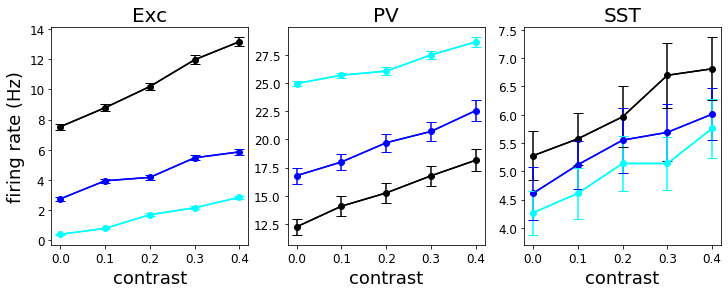

In [89]:
# create a function that takes the dictionaries as input and plots the contrast curves as output
def contCurves(meanDict,semDict,savefig=True):
    # data pre-processing
    data = {}
    for s in chr2str:
        lab = str(int(10*float(s)))  
        data['chr'+lab+'excMeans'] = np.zeros(len(cont))
        data['chr'+lab+'excSEMs'] = np.zeros(len(cont))
        i=0
        for c in cont:
            ind = 'local_%s'%c+'_PV_%s'%s
            data['chr'+lab+'excMeans'][i] = meanDict[ind][0]
            data['chr'+lab+'excSEMs'][i] = semDict[ind][0]
            i+=1
    for s in chr2str:
        lab = str(int(10*float(s)))  
        data['chr'+lab+'pvMeans'] = np.zeros(len(cont))
        data['chr'+lab+'pvSEMs'] = np.zeros(len(cont))
        i=0
        for c in cont:
            ind = 'local_%s'%c+'_PV_%s'%s
            data['chr'+lab+'pvMeans'][i] = meanDict[ind][1]
            data['chr'+lab+'pvSEMs'][i] = semDict[ind][1]
            i+=1    
    for s in chr2str:
        lab = str(int(10*float(s)))  
        data['chr'+lab+'somMeans'] = np.zeros(len(cont))
        data['chr'+lab+'somSEMs'] = np.zeros(len(cont))
        i=0
        for c in cont:
            ind = 'local_%s'%c+'_PV_%s'%s
            data['chr'+lab+'somMeans'][i] = meanDict[ind][2]
            data['chr'+lab+'somSEMs'][i] = semDict[ind][2]
            i+=1
            
    fig, axes = plt.subplots(1,3,figsize = (12,4),gridspec_kw = {'height_ratios':[1]})
    
    # Exc
    ax00 = axes[0] # left
    ax00.set_title('Exc',fontsize=20)
    ax00.errorbar(cont, data['chr0excMeans'], yerr = data['chr0excSEMs'], c='black', capsize=5)
    ax00.plot(cont,data['chr0excMeans'],linestyle='-',marker='o',color='black',label='control')
    ax00.errorbar(cont, data['chr1excMeans'], yerr = data['chr1excSEMs'], c='blue', capsize=5)
    ax00.plot(cont,data['chr1excMeans'],linestyle='-',marker='o',color='blue',label='low ChR2')
    ax00.errorbar(cont, data['chr2excMeans'], yerr = data['chr2excSEMs'], c='aqua', capsize=5)
    ax00.set_xticks([0,0.1,0.2,0.3,0.4])
    ax00.tick_params(axis='x',labelsize=12)
    ax00.tick_params(axis='y',labelsize=12)
    ax00.set_xlabel('contrast',fontsize=18)
    ax00.plot(cont,data['chr2excMeans'],linestyle='-',marker='o',color='aqua',label='high ChR2')    
    ax00.set_ylabel('firing rate (Hz)',fontsize=18)

    # PV
    ax01 = axes[1] # middle
    ax01.set_title('PV',fontsize=20)
    ax01.errorbar(cont, data['chr0pvMeans'], yerr = data['chr0pvSEMs'], c='black', capsize=5)
    ax01.plot(cont,data['chr0pvMeans'],linestyle='-',marker='o',color='black',label='control')
    ax01.errorbar(cont, data['chr1pvMeans'], yerr = data['chr1pvSEMs'], c='blue', capsize=5)
    ax01.plot(cont,data['chr1pvMeans'],linestyle='-',marker='o',color='blue',label='low ChR2')
    ax01.errorbar(cont, data['chr2pvMeans'], yerr = data['chr2pvSEMs'], c='aqua', capsize=5)
    ax01.plot(cont,data['chr2pvMeans'],linestyle='-',marker='o',color='aqua',label='high ChR2')
    ax01.set_xticks([0,0.1,0.2,0.3,0.4])
    ax01.tick_params(axis='x',labelsize=12)
    ax01.tick_params(axis='y',labelsize=12)
    ax01.set_xlabel('contrast',fontsize=18)

    # SOM
    ax02 = axes[2] # right
    ax02.set_title('SST',fontsize=20)
    ax02.errorbar(cont, data['chr0somMeans'], yerr = data['chr0somSEMs'], c='black', capsize=5)
    ax02.plot(cont,data['chr0somMeans'],linestyle='-',marker='o',color='black',label='control')
    ax02.errorbar(cont, data['chr1somMeans'], yerr = data['chr1somSEMs'], c='blue', capsize=5)
    ax02.plot(cont,data['chr1somMeans'],linestyle='-',marker='o',color='blue',label='low ChR2')
    ax02.errorbar(cont, data['chr2somMeans'], yerr = data['chr2somSEMs'], c='aqua', capsize=5)
    ax02.plot(cont,data['chr2somMeans'],linestyle='-',marker='o',color='aqua',label='high ChR2')
    ax02.set_xticks([0,0.1,0.2,0.3,0.4])
    ax02.tick_params(axis='x',labelsize=12)
    ax02.tick_params(axis='y',labelsize=12)
    ax02.set_xlabel('contrast',fontsize=18)
    
    if savefig:
        plt.savefig('localPVstim.png',bbox_inches='tight',dpi=200)
    plt.show()
contCurves(meanDict,semDict)

In [6]:
def contCurves(meanDict,semDict,savefig=True):
    # pre-processing
    ################ PV stim ################
    PVdata = {}
    for s in chr2str:
        lab = str(int(10*float(s)))  
        PVdata['chr'+lab+'excMeans'] = np.zeros(len(cont))
        PVdata['chr'+lab+'excSEMs'] = np.zeros(len(cont))
        i=0
        for c in cont:
            ind = 'local_%s'%c+'_PV_%s'%s
            PVdata['chr'+lab+'excMeans'][i] = meanDict[ind][0]
            PVdata['chr'+lab+'excSEMs'][i] = semDict[ind][0]
            i+=1
    for s in chr2str:
        lab = str(int(10*float(s)))  
        PVdata['chr'+lab+'pvMeans'] = np.zeros(len(cont))
        PVdata['chr'+lab+'pvSEMs'] = np.zeros(len(cont))
        i=0
        for c in cont:
            ind = 'local_%s'%c+'_PV_%s'%s
            PVdata['chr'+lab+'pvMeans'][i] = meanDict[ind][1]
            PVdata['chr'+lab+'pvSEMs'][i] = semDict[ind][1]
            i+=1    
    for s in chr2str:
        lab = str(int(10*float(s)))  
        PVdata['chr'+lab+'somMeans'] = np.zeros(len(cont))
        PVdata['chr'+lab+'somSEMs'] = np.zeros(len(cont))
        i=0
        for c in cont:
            ind = 'local_%s'%c+'_PV_%s'%s
            PVdata['chr'+lab+'somMeans'][i] = meanDict[ind][2]
            PVdata['chr'+lab+'somSEMs'][i] = semDict[ind][2]
            i+=1
    ################ SOM stim ################
    SOMdata = {}
    for s in chr2str:
        lab = str(int(10*float(s)))  
        SOMdata['chr'+lab+'excMeans'] = np.zeros(len(cont))
        SOMdata['chr'+lab+'excSEMs'] = np.zeros(len(cont))
        i=0
        for c in cont:
            ind = 'local_%s'%c+'_SOM_%s'%s
            SOMdata['chr'+lab+'excMeans'][i] = meanDict[ind][0]
            SOMdata['chr'+lab+'excSEMs'][i] = semDict[ind][0]
            i+=1
    for s in chr2str:
        lab = str(int(10*float(s)))  
        SOMdata['chr'+lab+'pvMeans'] = np.zeros(len(cont))
        SOMdata['chr'+lab+'pvSEMs'] = np.zeros(len(cont))
        i=0
        for c in cont:
            ind = 'local_%s'%c+'_SOM_%s'%s
            SOMdata['chr'+lab+'pvMeans'][i] = meanDict[ind][1]
            SOMdata['chr'+lab+'pvSEMs'][i] = semDict[ind][1]
            i+=1    
    for s in chr2str:
        lab = str(int(10*float(s)))  
        SOMdata['chr'+lab+'somMeans'] = np.zeros(len(cont))
        SOMdata['chr'+lab+'somSEMs'] = np.zeros(len(cont))
        i=0
        for c in cont:
            ind = 'local_%s'%c+'_SOM_%s'%s
            SOMdata['chr'+lab+'somMeans'][i] = meanDict[ind][2]
            SOMdata['chr'+lab+'somSEMs'][i] = semDict[ind][2]
            i+=1
            
    # PLOTTING
    fig, axes = plt.subplots(2,3,figsize = (12,8),gridspec_kw = {'height_ratios':[1,1]})

    # Exc response to PV stim
    ax00 = axes[0][0] # left
    ax00.set_title('Exc',fontsize=20)
    ax00.errorbar(cont, PVdata['chr0excMeans'], yerr = PVdata['chr0excSEMs'], c='black', capsize=5)
    ax00.plot(cont,PVdata['chr0excMeans'],linestyle='-',marker='o',color='black',label='control')
    ax00.errorbar(cont, PVdata['chr1excMeans'], yerr = PVdata['chr1excSEMs'], c='blue', capsize=5)
    ax00.plot(cont,PVdata['chr1excMeans'],linestyle='-',marker='o',color='blue',label='low ChR2')
    ax00.errorbar(cont, PVdata['chr2excMeans'], yerr = PVdata['chr2excSEMs'], c='aqua', capsize=5)
    ax00.set_xticks([])
    ax00.tick_params(axis='y',labelsize=12)
    ax00.plot(cont,PVdata['chr2excMeans'],linestyle='-',marker='o',color='aqua',label='high ChR2')    
    ax00.set_ylabel('firing rate (Hz)',fontsize=18)

    # PV response to PV stim
    ax01 = axes[0][1] # middle
    ax01.set_title('PV',fontsize=20)
    ax01.errorbar(cont, PVdata['chr0pvMeans'], yerr = PVdata['chr0pvSEMs'], c='black', capsize=5)
    ax01.plot(cont,PVdata['chr0pvMeans'],linestyle='-',marker='o',color='black',label='control')
    ax01.errorbar(cont, PVdata['chr1pvMeans'], yerr = PVdata['chr1pvSEMs'], c='blue', capsize=5)
    ax01.plot(cont,PVdata['chr1pvMeans'],linestyle='-',marker='o',color='blue',label='low ChR2')
    ax01.errorbar(cont, PVdata['chr2pvMeans'], yerr = PVdata['chr2pvSEMs'], c='aqua', capsize=5)
    ax01.plot(cont,PVdata['chr2pvMeans'],linestyle='-',marker='o',color='aqua',label='high ChR2')
    ax01.set_xticks([])
    ax01.tick_params(axis='y',labelsize=12)

    # SOM response to PV stim
    ax02 = axes[0][2] # right
    ax02.set_title('SST',fontsize=20)
    ax02.errorbar(cont, PVdata['chr0somMeans'], yerr = PVdata['chr0somSEMs'], c='black', capsize=5)
    ax02.plot(cont,PVdata['chr0somMeans'],linestyle='-',marker='o',color='black',label='control')
    ax02.errorbar(cont, PVdata['chr1somMeans'], yerr = PVdata['chr1somSEMs'], c='blue', capsize=5)
    ax02.plot(cont,PVdata['chr1somMeans'],linestyle='-',marker='o',color='blue',label='low ChR2')
    ax02.errorbar(cont, PVdata['chr2somMeans'], yerr = PVdata['chr2somSEMs'], c='aqua', capsize=5)
    ax02.plot(cont,PVdata['chr2somMeans'],linestyle='-',marker='o',color='aqua',label='high ChR2')
    ax02.set_xticks([])
    ax02.tick_params(axis='y',labelsize=12)

    # Exc response to SOM stim
    ax10 = axes[1][0] # bottom left
    ax10.errorbar(cont, SOMdata['chr0excMeans'], yerr = SOMdata['chr0excSEMs'], c='black', capsize=5)
    ax10.plot(cont,SOMdata['chr0excMeans'],linestyle='-',marker='o',color='black',label='control')
    ax10.errorbar(cont, SOMdata['chr1excMeans'], yerr = SOMdata['chr1excSEMs'], c='darkorange', capsize=5)
    ax10.plot(cont,SOMdata['chr1excMeans'],linestyle='-',marker='o',color='darkorange',label='low ChR2')
    ax10.errorbar(cont, SOMdata['chr2excMeans'], yerr = SOMdata['chr2excSEMs'], c='gold', capsize=5)
    ax10.plot(cont,SOMdata['chr2excMeans'],linestyle='-',marker='o',color='gold',label='high ChR2')
    ax10.tick_params(axis='y',labelsize=12)
    ax10.tick_params(axis='x',labelsize=12)
    ax10.set_xlabel('contrast',fontsize=18)
    ax10.set_ylabel('firing rate (Hz)',fontsize=18)

    # PV response to SOM stim
    ax11 = axes[1][1] # bottom middle
    ax11.tick_params(axis='y',labelsize=12)
    ax11.tick_params(axis='x',labelsize=12)
    ax11.set_xlabel('contrast',fontsize=18)
    ax11.errorbar(cont, SOMdata['chr0pvMeans'], yerr = SOMdata['chr0pvSEMs'], c='black', capsize=5)
    ax11.plot(cont,SOMdata['chr0pvMeans'],linestyle='-',marker='o',color='black',label='control')
    ax11.errorbar(cont, SOMdata['chr1pvMeans'], yerr = SOMdata['chr1pvSEMs'], c='darkorange', capsize=5)
    ax11.plot(cont,SOMdata['chr1pvMeans'],linestyle='-',marker='o',color='orange',label='low ChR2')
    ax11.errorbar(cont, SOMdata['chr2pvMeans'], yerr = SOMdata['chr2pvSEMs'], c='gold', capsize=5)
    ax11.plot(cont,SOMdata['chr2pvMeans'],linestyle='-',marker='o',color='gold',label='high ChR2')

    # SOM response to SOM stim
    ax12 = axes[1][2] # bottom right
    ax12.tick_params(axis='y',labelsize=12)
    ax12.tick_params(axis='x',labelsize=12)
    ax12.set_xlabel('contrast',fontsize=18)
    ax12.errorbar(cont, SOMdata['chr0somMeans'], yerr = SOMdata['chr0somSEMs'], c='black', capsize=5)
    ax12.plot(cont,SOMdata['chr0somMeans'],linestyle='-',marker='o',color='black',label='control')
    ax12.errorbar(cont, SOMdata['chr1somMeans'], yerr = SOMdata['chr1somSEMs'], c='darkorange', capsize=5)
    ax12.plot(cont,SOMdata['chr1somMeans'],linestyle='-',marker='o',color='darkorange',label='low ChR2')
    ax12.errorbar(cont, SOMdata['chr2somMeans'], yerr = SOMdata['chr2somSEMs'], c='gold', capsize=5)
    ax12.plot(cont,SOMdata['chr2somMeans'],linestyle='-',marker='o',color='gold',label='high ChR2')
    
    if savefig:
        plt.savefig('distal_contrastCurves.png',bbox_inches='tight',dpi=200)
        
    plt.show()
    
#contCurves(meanDict,semDict)

In [3]:
loc = ['distal'] # eventually append distal
cont = ['0.0','0.1','0.2','0.3','0.4'] # contrast, eventually append 0.1, 0.2, 0.3, 0.4
chr2tar = ['PV','SOM'] # chr2 target, eventually append SOM
chr2str = ['0.0','0.1','0.2'] # only do these three
j = 0
for l in loc:
    for c in cont:
        for t in chr2tar:
            for s in chr2str:
                filedir = '%s'%l+'_'+'%s'%c+'_'+'%s'%t+'_'+'%s'%s
                j=j+1
                print(filedir)

distal_0.0_PV_0.0
distal_0.0_PV_0.1
distal_0.0_PV_0.2
distal_0.0_SOM_0.0
distal_0.0_SOM_0.1
distal_0.0_SOM_0.2
distal_0.1_PV_0.0
distal_0.1_PV_0.1
distal_0.1_PV_0.2
distal_0.1_SOM_0.0
distal_0.1_SOM_0.1
distal_0.1_SOM_0.2
distal_0.2_PV_0.0
distal_0.2_PV_0.1
distal_0.2_PV_0.2
distal_0.2_SOM_0.0
distal_0.2_SOM_0.1
distal_0.2_SOM_0.2
distal_0.3_PV_0.0
distal_0.3_PV_0.1
distal_0.3_PV_0.2
distal_0.3_SOM_0.0
distal_0.3_SOM_0.1
distal_0.3_SOM_0.2
distal_0.4_PV_0.0
distal_0.4_PV_0.1
distal_0.4_PV_0.2
distal_0.4_SOM_0.0
distal_0.4_SOM_0.1
distal_0.4_SOM_0.2


In [4]:
loc = ['distal'] # eventually append distal
cont = ['0.0','0.1','0.2','0.3','0.4'] # contrast, eventually append 0.1, 0.2, 0.3, 0.4
chr2tar = ['PV','SOM'] # chr2 target, eventually append SOM
chr2str = ['0.0','0.1','0.2'] # only do these three
meanDict = {}
semDict = {}
j = 0
for l in loc:
    for c in cont:
        for t in chr2tar:
            for s in chr2str:
                filedir = '%s'%l+'_'+'%s'%c+'_'+'%s'%t+'_'+'%s'%s
                j=j+1
                #print(filedir)
                meanDict[filedir],semDict[filedir] = getRatesAndErrs(filedir,10000,40,10)
print('meanDict = '+str(meanDict))
print('\nsemDict = '+str(semDict))

meanDict = {'distal_0.0_PV_0.0': [7.527777777777778, 12.258620689655173, 5.275229357798165], 'distal_0.0_PV_0.1': [8.386363636363637, 12.517241379310345, 5.068807339449541], 'distal_0.0_PV_0.2': [7.3232323232323235, 12.448275862068966, 5.022935779816514], 'distal_0.0_SOM_0.0': [7.527777777777778, 12.258620689655173, 5.275229357798165], 'distal_0.0_SOM_0.1': [7.611111111111111, 12.293103448275861, 5.18348623853211], 'distal_0.0_SOM_0.2': [7.792929292929293, 12.206896551724139, 5.206422018348624], 'distal_0.1_PV_0.0': [8.785353535353535, 14.086206896551724, 5.573394495412844], 'distal_0.1_PV_0.1': [9.1010101010101, 13.844827586206897, 5.504587155963303], 'distal_0.1_PV_0.2': [8.881313131313131, 14.827586206896552, 5.504587155963303], 'distal_0.1_SOM_0.0': [8.785353535353535, 14.086206896551724, 5.573394495412844], 'distal_0.1_SOM_0.1': [9.982323232323232, 14.155172413793103, 5.5504587155963305], 'distal_0.1_SOM_0.2': [8.984848484848484, 14.224137931034482, 5.36697247706422], 'distal_0.2_

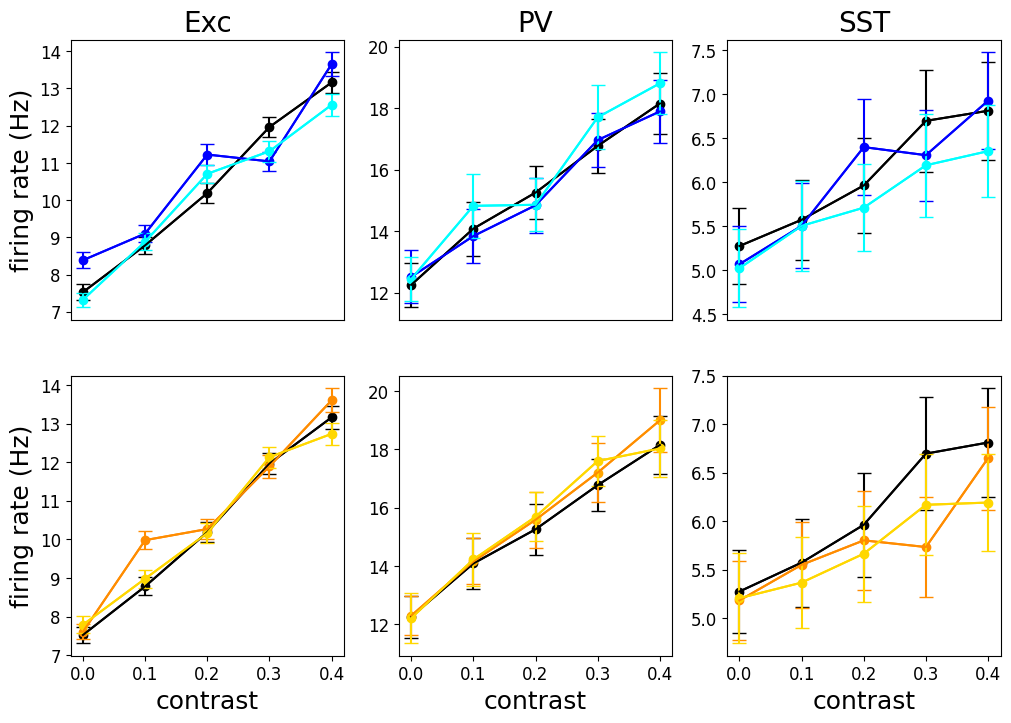

In [8]:
def contCurvesD(meanDict,semDict,savefig=True):
    # pre-processing
    ################ PV stim ################
    PVdata = {}
    for s in chr2str:
        lab = str(int(10*float(s)))  
        PVdata['chr'+lab+'excMeans'] = np.zeros(len(cont))
        PVdata['chr'+lab+'excSEMs'] = np.zeros(len(cont))
        i=0
        for c in cont:
            ind = 'distal_%s'%c+'_PV_%s'%s
            PVdata['chr'+lab+'excMeans'][i] = meanDict[ind][0]
            PVdata['chr'+lab+'excSEMs'][i] = semDict[ind][0]
            i+=1
    for s in chr2str:
        lab = str(int(10*float(s)))  
        PVdata['chr'+lab+'pvMeans'] = np.zeros(len(cont))
        PVdata['chr'+lab+'pvSEMs'] = np.zeros(len(cont))
        i=0
        for c in cont:
            ind = 'distal_%s'%c+'_PV_%s'%s
            PVdata['chr'+lab+'pvMeans'][i] = meanDict[ind][1]
            PVdata['chr'+lab+'pvSEMs'][i] = semDict[ind][1]
            i+=1    
    for s in chr2str:
        lab = str(int(10*float(s)))  
        PVdata['chr'+lab+'somMeans'] = np.zeros(len(cont))
        PVdata['chr'+lab+'somSEMs'] = np.zeros(len(cont))
        i=0
        for c in cont:
            ind = 'distal_%s'%c+'_PV_%s'%s
            PVdata['chr'+lab+'somMeans'][i] = meanDict[ind][2]
            PVdata['chr'+lab+'somSEMs'][i] = semDict[ind][2]
            i+=1
    ################ SOM stim ################
    SOMdata = {}
    for s in chr2str:
        lab = str(int(10*float(s)))  
        SOMdata['chr'+lab+'excMeans'] = np.zeros(len(cont))
        SOMdata['chr'+lab+'excSEMs'] = np.zeros(len(cont))
        i=0
        for c in cont:
            ind = 'distal_%s'%c+'_SOM_%s'%s
            SOMdata['chr'+lab+'excMeans'][i] = meanDict[ind][0]
            SOMdata['chr'+lab+'excSEMs'][i] = semDict[ind][0]
            i+=1
    for s in chr2str:
        lab = str(int(10*float(s)))  
        SOMdata['chr'+lab+'pvMeans'] = np.zeros(len(cont))
        SOMdata['chr'+lab+'pvSEMs'] = np.zeros(len(cont))
        i=0
        for c in cont:
            ind = 'distal_%s'%c+'_SOM_%s'%s
            SOMdata['chr'+lab+'pvMeans'][i] = meanDict[ind][1]
            SOMdata['chr'+lab+'pvSEMs'][i] = semDict[ind][1]
            i+=1    
    for s in chr2str:
        lab = str(int(10*float(s)))  
        SOMdata['chr'+lab+'somMeans'] = np.zeros(len(cont))
        SOMdata['chr'+lab+'somSEMs'] = np.zeros(len(cont))
        i=0
        for c in cont:
            ind = 'distal_%s'%c+'_SOM_%s'%s
            SOMdata['chr'+lab+'somMeans'][i] = meanDict[ind][2]
            SOMdata['chr'+lab+'somSEMs'][i] = semDict[ind][2]
            i+=1
            
    # PLOTTING
    fig, axes = plt.subplots(2,3,figsize = (12,8),gridspec_kw = {'height_ratios':[1,1]})

    # Exc response to PV stim
    ax00 = axes[0][0] # left
    ax00.set_title('Exc',fontsize=20)
    ax00.errorbar(cont, PVdata['chr0excMeans'], yerr = PVdata['chr0excSEMs'], c='black', capsize=5)
    ax00.plot(cont,PVdata['chr0excMeans'],linestyle='-',marker='o',color='black',label='control')
    ax00.errorbar(cont, PVdata['chr1excMeans'], yerr = PVdata['chr1excSEMs'], c='blue', capsize=5)
    ax00.plot(cont,PVdata['chr1excMeans'],linestyle='-',marker='o',color='blue',label='low ChR2')
    ax00.errorbar(cont, PVdata['chr2excMeans'], yerr = PVdata['chr2excSEMs'], c='aqua', capsize=5)
    ax00.set_xticks([])
    ax00.tick_params(axis='y',labelsize=12)
    ax00.plot(cont,PVdata['chr2excMeans'],linestyle='-',marker='o',color='aqua',label='high ChR2')    
    ax00.set_ylabel('firing rate (Hz)',fontsize=18)

    # PV response to PV stim
    ax01 = axes[0][1] # middle
    ax01.set_title('PV',fontsize=20)
    ax01.errorbar(cont, PVdata['chr0pvMeans'], yerr = PVdata['chr0pvSEMs'], c='black', capsize=5)
    ax01.plot(cont,PVdata['chr0pvMeans'],linestyle='-',marker='o',color='black',label='control')
    ax01.errorbar(cont, PVdata['chr1pvMeans'], yerr = PVdata['chr1pvSEMs'], c='blue', capsize=5)
    ax01.plot(cont,PVdata['chr1pvMeans'],linestyle='-',marker='o',color='blue',label='low ChR2')
    ax01.errorbar(cont, PVdata['chr2pvMeans'], yerr = PVdata['chr2pvSEMs'], c='aqua', capsize=5)
    ax01.plot(cont,PVdata['chr2pvMeans'],linestyle='-',marker='o',color='aqua',label='high ChR2')
    ax01.set_xticks([])
    ax01.tick_params(axis='y',labelsize=12)

    # SOM response to PV stim
    ax02 = axes[0][2] # right
    ax02.set_title('SST',fontsize=20)
    ax02.errorbar(cont, PVdata['chr0somMeans'], yerr = PVdata['chr0somSEMs'], c='black', capsize=5)
    ax02.plot(cont,PVdata['chr0somMeans'],linestyle='-',marker='o',color='black',label='control')
    ax02.errorbar(cont, PVdata['chr1somMeans'], yerr = PVdata['chr1somSEMs'], c='blue', capsize=5)
    ax02.plot(cont,PVdata['chr1somMeans'],linestyle='-',marker='o',color='blue',label='low ChR2')
    ax02.errorbar(cont, PVdata['chr2somMeans'], yerr = PVdata['chr2somSEMs'], c='aqua', capsize=5)
    ax02.plot(cont,PVdata['chr2somMeans'],linestyle='-',marker='o',color='aqua',label='high ChR2')
    ax02.set_xticks([])
    ax02.tick_params(axis='y',labelsize=12)

    # Exc response to SOM stim
    ax10 = axes[1][0] # bottom left
    ax10.errorbar(cont, SOMdata['chr0excMeans'], yerr = SOMdata['chr0excSEMs'], c='black', capsize=5)
    ax10.plot(cont,SOMdata['chr0excMeans'],linestyle='-',marker='o',color='black',label='control')
    ax10.errorbar(cont, SOMdata['chr1excMeans'], yerr = SOMdata['chr1excSEMs'], c='darkorange', capsize=5)
    ax10.plot(cont,SOMdata['chr1excMeans'],linestyle='-',marker='o',color='darkorange',label='low ChR2')
    ax10.errorbar(cont, SOMdata['chr2excMeans'], yerr = SOMdata['chr2excSEMs'], c='gold', capsize=5)
    ax10.plot(cont,SOMdata['chr2excMeans'],linestyle='-',marker='o',color='gold',label='high ChR2')
    ax10.tick_params(axis='y',labelsize=12)
    ax10.tick_params(axis='x',labelsize=12)
    ax10.set_xlabel('contrast',fontsize=18)
    ax10.set_ylabel('firing rate (Hz)',fontsize=18)

    # PV response to SOM stim
    ax11 = axes[1][1] # bottom middle
    ax11.tick_params(axis='y',labelsize=12)
    ax11.tick_params(axis='x',labelsize=12)
    ax11.set_xlabel('contrast',fontsize=18)
    ax11.errorbar(cont, SOMdata['chr0pvMeans'], yerr = SOMdata['chr0pvSEMs'], c='black', capsize=5)
    ax11.plot(cont,SOMdata['chr0pvMeans'],linestyle='-',marker='o',color='black',label='control')
    ax11.errorbar(cont, SOMdata['chr1pvMeans'], yerr = SOMdata['chr1pvSEMs'], c='darkorange', capsize=5)
    ax11.plot(cont,SOMdata['chr1pvMeans'],linestyle='-',marker='o',color='orange',label='low ChR2')
    ax11.errorbar(cont, SOMdata['chr2pvMeans'], yerr = SOMdata['chr2pvSEMs'], c='gold', capsize=5)
    ax11.plot(cont,SOMdata['chr2pvMeans'],linestyle='-',marker='o',color='gold',label='high ChR2')

    # SOM response to SOM stim
    ax12 = axes[1][2] # bottom right
    ax12.tick_params(axis='y',labelsize=12)
    ax12.tick_params(axis='x',labelsize=12)
    ax12.set_xlabel('contrast',fontsize=18)
    ax12.errorbar(cont, SOMdata['chr0somMeans'], yerr = SOMdata['chr0somSEMs'], c='black', capsize=5)
    ax12.plot(cont,SOMdata['chr0somMeans'],linestyle='-',marker='o',color='black',label='control')
    ax12.errorbar(cont, SOMdata['chr1somMeans'], yerr = SOMdata['chr1somSEMs'], c='darkorange', capsize=5)
    ax12.plot(cont,SOMdata['chr1somMeans'],linestyle='-',marker='o',color='darkorange',label='low ChR2')
    ax12.errorbar(cont, SOMdata['chr2somMeans'], yerr = SOMdata['chr2somSEMs'], c='gold', capsize=5)
    ax12.plot(cont,SOMdata['chr2somMeans'],linestyle='-',marker='o',color='gold',label='high ChR2')
    
    if savefig:
        plt.savefig('distal_contrastCurves.png',bbox_inches='tight',dpi=200)
        
    plt.show()
    
contCurvesD(meanDict,semDict)

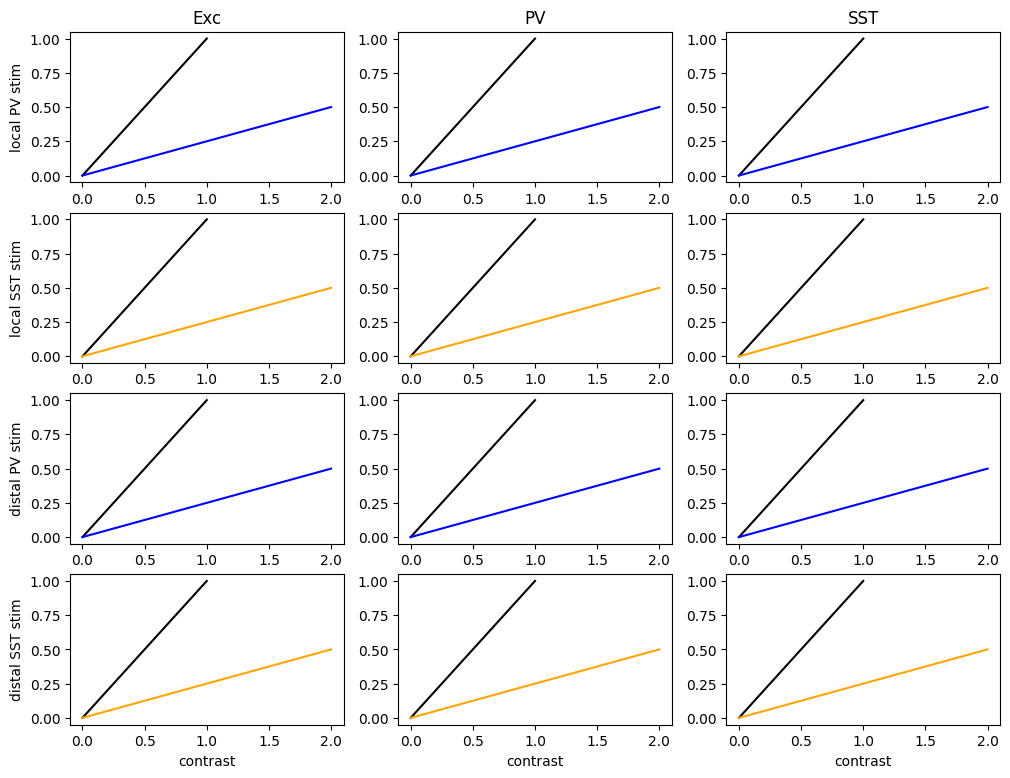

In [30]:
# test out plotting code   
fig, axes = plt.subplots(4,3,figsize = (12,9),gridspec_kw = {'height_ratios':[1,1,1,1]})

ax00 = axes[0][0] # top left
ax00.set_title('Exc')
ax00.plot([0,1],[0,1],color='black')
ax00.plot([0,2],[0,0.5],color='blue')
ax00.set_ylabel('local PV stim',fontsize=10)

ax01 = axes[0][1] # top middle
ax01.set_title('PV')
#ax01.set_yticks([])
ax01.plot([0,1],[0,1],color='black')
ax01.plot([0,2],[0,0.5],color='blue')

ax02 = axes[0][2] # top right
ax02.set_title('SST')
ax02.plot([0,1],[0,1],color='black')
ax02.plot([0,2],[0,0.5],color='blue')

ax10 = axes[1][0] # 
ax10.plot([0,1],[0,1],color='black')
ax10.plot([0,2],[0,0.5],color='orange')
ax10.set_ylabel('local SST stim',fontsize=10)

ax11 = axes[1][1] # 
ax11.plot([0,1],[0,1],color='black')
ax11.plot([0,2],[0,0.5],color='orange')

ax12 = axes[1][2] # 
ax12.plot([0,1],[0,1],color='black')
ax12.plot([0,2],[0,0.5],color='orange')

ax20 = axes[2][0] #
ax20.set_ylabel('distal PV stim',fontsize=10)
ax20.plot([0,1],[0,1],color='black')
ax20.plot([0,2],[0,0.5],color='blue')

ax21 = axes[2][1] # 
ax21.plot([0,1],[0,1],color='black')
ax21.plot([0,2],[0,0.5],color='blue')

ax22 = axes[2][2] # 
ax22.plot([0,1],[0,1],color='black')
ax22.plot([0,2],[0,0.5],color='blue')

ax30 = axes[3][0] # 
ax30.plot([0,1],[0,1],color='black')
ax30.plot([0,2],[0,0.5],color='orange')
ax30.set_xlabel('contrast',fontsize=10)
ax30.set_ylabel('distal SST stim',fontsize=10)

ax31 = axes[3][1] # 
ax31.plot([0,1],[0,1],color='black')
ax31.set_xlabel('contrast',fontsize=10)
ax31.plot([0,2],[0,0.5],color='orange')

ax32 = axes[3][2] #
ax32.set_xlabel('contrast',fontsize=10)
ax32.plot([0,1],[0,1],color='black')
ax32.plot([0,2],[0,0.5],color='orange')

plt.show()